In [102]:
#import required libraries

import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import scipy.stats as stats

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [103]:
#url to read data

url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [104]:
#for all males

allmales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [105]:
#for all females

allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [106]:
from pandas.tools.plotting import scatter_matrix

In [107]:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [108]:
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [109]:
#all males
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
#all females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
print allfemales['white']['Median income'][:2]

0      NaN
1    23780
Name: Median income, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1714AD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1EDECD30>]], dtype=object)

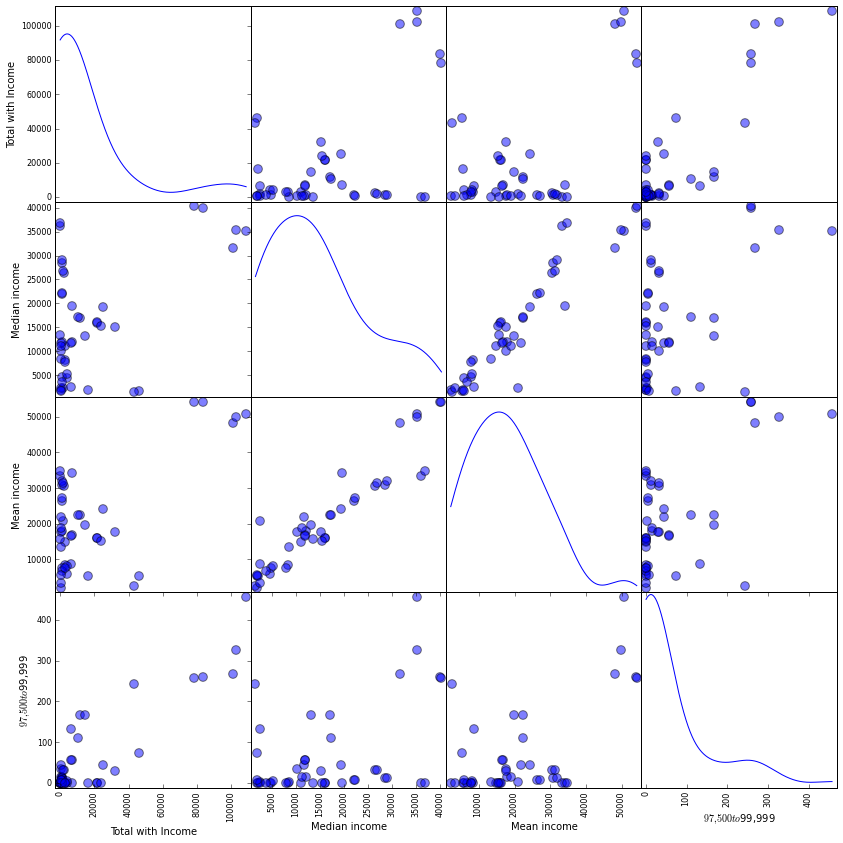

In [112]:
from pandas.tools.plotting import scatter_matrix
maledata = pd.DataFrame(allmales['all'])
maledata = pd.DataFrame(maledata, columns=['Total with Income', 'Median income', 'Mean income','$97,500 to $99,999'])
scatter_matrix(maledata, s=300, figsize=(14, 14), diagonal='kde')

In [113]:
print allmales['all']['Median income'][:20]

0       NaN
1     35228
2     39903
3     40298
4     19557
5      2359
6     15974
7      8232
8      1829
9     11010
10    10102
11    11988
12     4446
13     4696
14     1687
15     1444
16     1910
17     2455
18    16939
19    11896
Name: Median income, dtype: float64


In [114]:
allmales['all']['Median income'][1]

35228.0

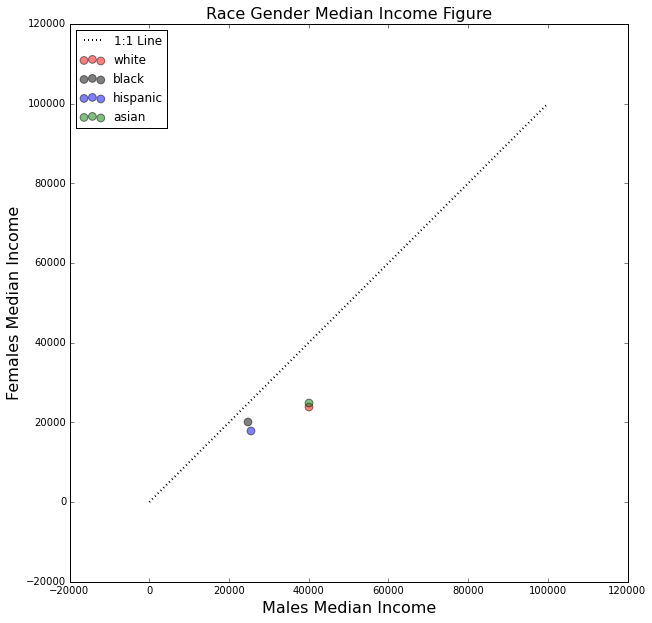

In [127]:
#plot the data depending on the race
pl.figure(figsize=(10,10))
pl.scatter(allmales['white']['Median income'][:2], allfemales['white']['Median income'][:2], s=60, c = 'red', alpha=0.5, label='white')
pl.scatter(allmales['black']['Median income'][:2], allfemales['black']['Median income'][:2], s=60, c = 'black', alpha=0.5, label='black')

pl.scatter(allmales['hispanic']['Median income'][:2], allfemales['hispanic']['Median income'][:2], s=60, c = 'blue', alpha=0.5, label='hispanic')
pl.scatter(allmales['asian']['Median income'][:2], allfemales['asian']['Median income'][:2], s=60, c = 'green', alpha=0.5, label='asian')

pl.plot([0,100000], [0,100000], label="1:1 Line", linewidth=2.0, color='k', linestyle=':')

pl.title('Race Gender Median Income Figure', fontsize = 16)
pl.xlabel('Males Median Income', fontsize = 16)
pl.ylabel('Females Median Income', fontsize = 16)

pl.legend( loc=2, fontsize = 12)

pl.show()

In [128]:
# Median income male
malea = allmales['all']['Median income'][1]
malew = allmales['white']['Median income'][1]
maleb = allmales['black']['Median income'][1]
maleh = allmales['hispanic']['Median income'][1]
maleas = allmales['asian']['Median income'][1]

# Median income male
femalea = allfemales['all']['Median income'][1]
femalew = allfemales['white']['Median income'][1]
femaleb = allfemales['black']['Median income'][1]
femaleh = allfemales['hispanic']['Median income'][1]
femaleas = allfemales['asian']['Median income'][1]

In [129]:
#fit and plot here

import statsmodels.api as sm
import statsmodels.formula.api as smf

m = [malea, malew, maleb, maleh, maleas]
f = [femalea, femalew, femaleb, femaleh, femaleas]

X = sm.add_constant(m)
model = smf.OLS(f, X)
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Tue, 20 Oct 2015   Prob (F-statistic):             0.0176
Time:                        00:39:13   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

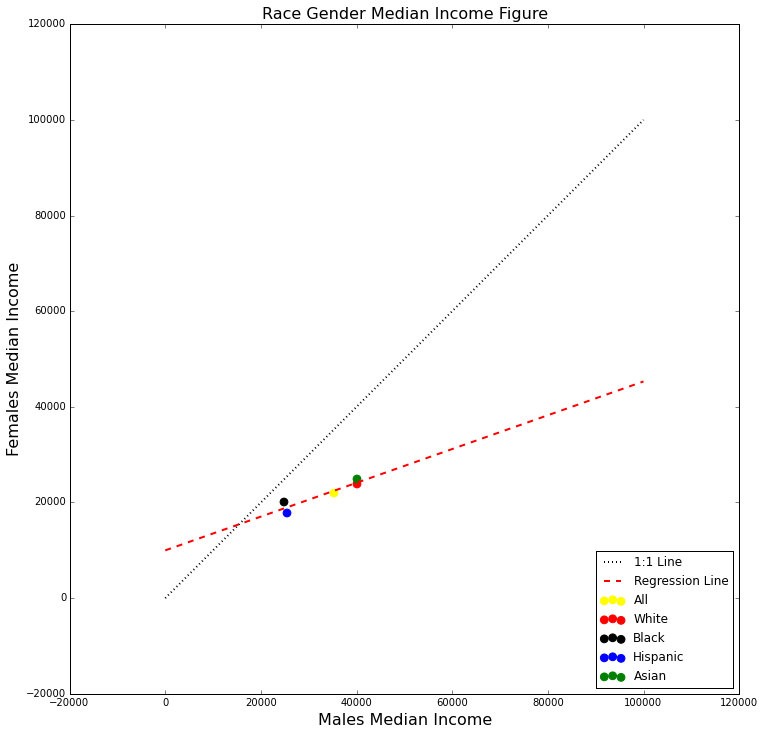

In [130]:
pl.figure(figsize=(12,12))
pl.scatter(malea, femalea, s=60, color='yellow', label='All')
pl.scatter(malew, femalew, s=60, color='red', label='White')
pl.scatter(maleb, femaleb, s=60, color='black', label='Black')
pl.scatter(maleh, femaleh, s=60, color='blue', label='Hispanic')
pl.scatter(maleas, femaleas, s=60, color='green', label='Asian')

pl.title('Race Gender Median Income Figure', fontsize = 16)
pl.xlabel('Males Median Income', fontsize = 16)
pl.ylabel('Females Median Income', fontsize = 16)

pl.plot([0,100000], [0,100000], label="1:1 Line", linestyle=':', linewidth=2.0, color='k')

X = arange(0, 100000, 1)
Y1 = fit.params[0] + fit.params[1]*X

pl.plot(X, Y1, label="Regression Line", color = 'r', linewidth=2.0, linestyle='--')
pl.legend(loc='lower right')



In [131]:
#bst regression line
cor = stats.spearmanr(m, f)

beta1=cor[0]*np.std(f)/np.std(m)
beta0=np.mean(f)-beta1*np.mean(m)

print beta1, beta0

0.338176888526 10485.9510732


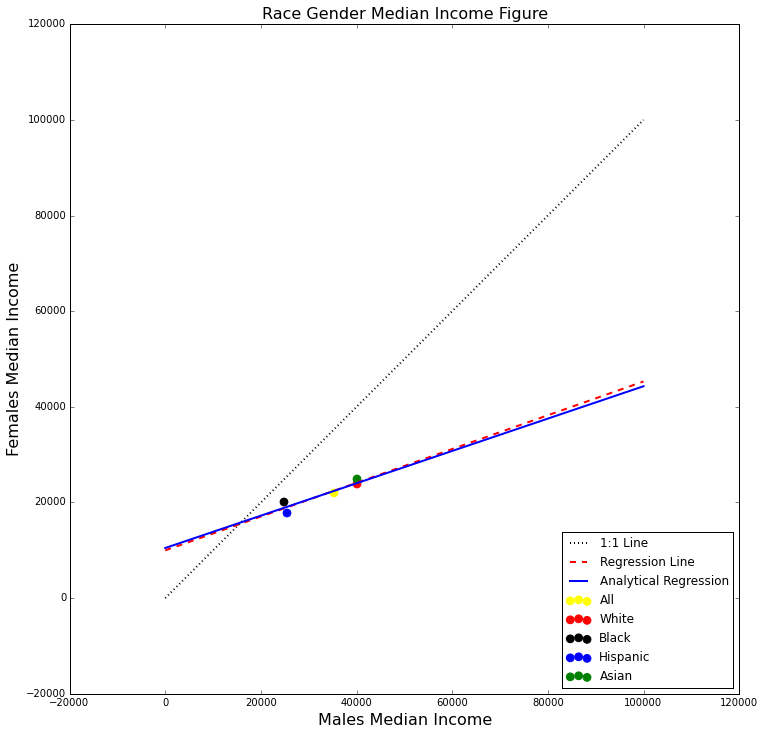

In [132]:
pl.figure(figsize=(12,12))
pl.scatter(malea, femalea, s=60, color='yellow', label='All')
pl.scatter(malew, femalew, s=60, color='red', label='White')
pl.scatter(maleb, femaleb, s=60, color='black', label='Black')
pl.scatter(maleh, femaleh, s=60, color='blue', label='Hispanic')
pl.scatter(maleas, femaleas, s=60, color='green', label='Asian')

pl.title('Race Gender Median Income Figure', fontsize = 16)
pl.xlabel('Males Median Income', fontsize = 16)
pl.ylabel('Females Median Income', fontsize = 16)
pl.plot([0,100000], [0,100000], label="1:1 Line", linestyle=':', linewidth=2.0, color='k')

X = arange(0, 100000, 1)
Y1 = fit.params[0] + fit.params[1]*X

pl.plot(X, Y1, label="Regression Line", color='r', linewidth=2.0, linestyle='--')
pl.plot([0, 100000], [0*beta1+beta0, 100000*beta1+beta0], linewidth=2.0, label = "Analytical Regression")

pl.legend(loc='lower right')

In [133]:
#create mask and deal with the nan vaues

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

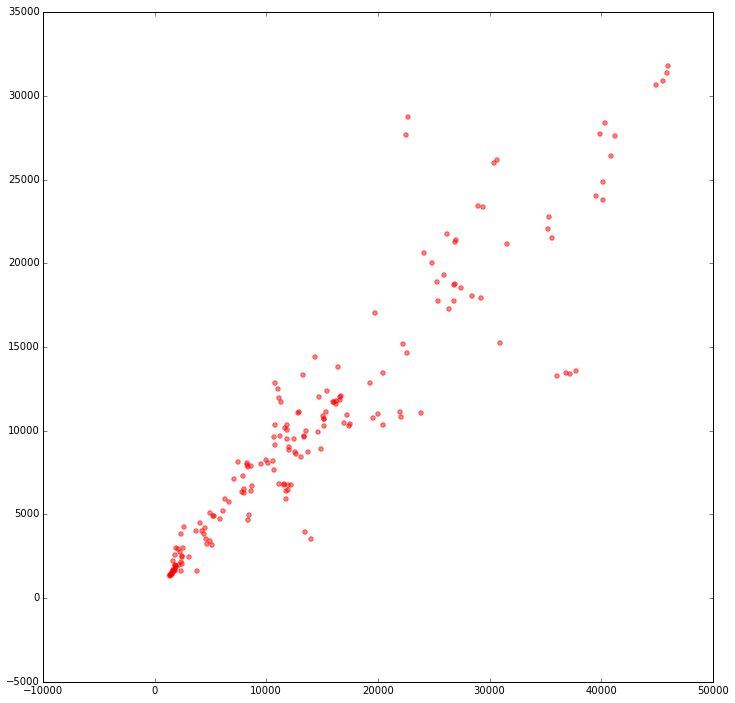

In [134]:
#plot
pl.figure(figsize=(12,12))
pl.scatter(all_males,all_females, alpha=.5, s=20,color = 'red')

In [135]:
#leverage points

m, b = np.polyfit(~np.isnan(all_males), ~np.isnan(all_females), deg=1)
print m, b

0.843645337564 0.129032258065


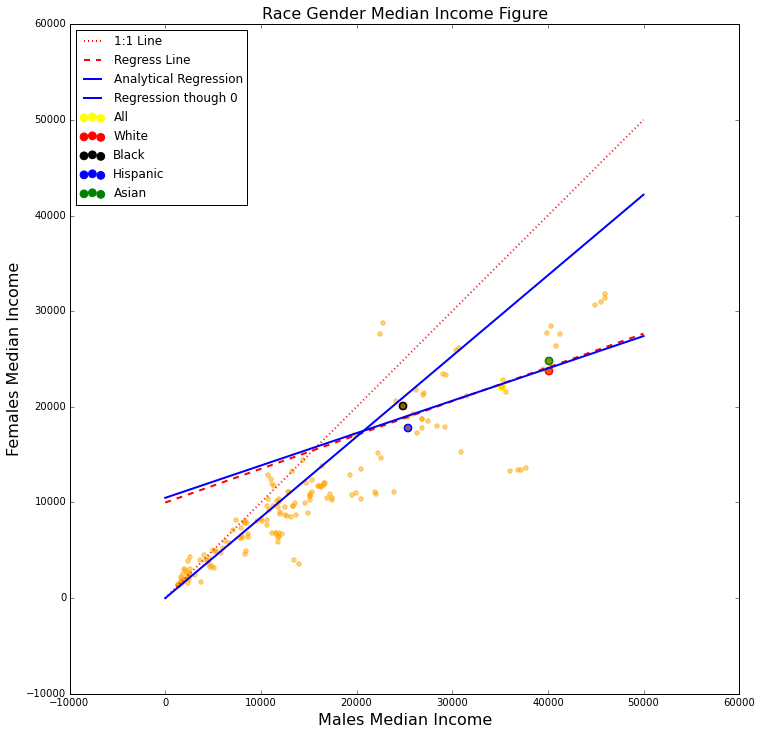

In [136]:
pl.figure(figsize=(12,12))
pl.scatter(malea, femalea, s=60, color='yellow', label='All')
pl.scatter(malew, femalew, s=60, color='red', label='White')
pl.scatter(maleb, femaleb, s=60, color='black', label='Black')
pl.scatter(maleh, femaleh, s=60, color='blue', label='Hispanic')
pl.scatter(maleas, femaleas, s=60, color='green', label='Asian')

pl.title('Race Gender Median Income Figure', fontsize = 16)
pl.xlabel('Males Median Income', fontsize = 16)
pl.ylabel('Females Median Income', fontsize = 16)
pl.plot([0,50000], [0,50000], label="1:1 Line", linestyle=':', linewidth=2.0, color='red')


#regression line fit draw
X = arange(0, 50000, 1)
Y1 = fit.params[0] + fit.params[1]*X
pl.plot(X, Y1, label="Regress Line", color='r', linewidth=2.0, linestyle='--')

#analytical line fit draw
pl.plot([0, 50000], [0*beta1+beta0, 50000*beta1+beta0], linewidth=2.0, label = "Analytical Regression")


#regression through 0
Y2 = m*X + b
pl.plot(X, Y2, label="Regression though 0", color='b', linewidth=2.0)

pl.legend(loc='best')

pl.scatter(all_males,all_females, alpha=.5, s=20, color = 'orange')

In [125]:
# Ideal case
ideastipend = 500000
womanstipend = idealstipend*m+b
print womanstipend

126546.929667


İdeal stipend should be 126.546.9296....

The earning ranking changes also depending on the gender for example;hispanic man earns more than the ale gender. At the overall, hispanic race earns more many than the other races in both two gender.